## Table of Contents
* [1. Exploratory Data Analysis](#eda)
    * [1.1. Downloading data](#download)
    * [1.2. Data Evaluation](#evaluation)
    * [1.3. Selecting the country](#countries)
        * [1.3.1. Dutch dataset](#select_dutch)
        * [1.3.2. Italian dataset](#select_italian)
        * [1.3.3. The UK dataset](#select_uk)
        * [1.3.4. German dataset](#select_german)
    
<!--     * [1.2. Deleting outliers and mistakes in data](#1_2)
    * [1.3. Adding new columns](#1_3)
    * [1.4. Adding Geospatial data](#1_4) -->
<!--     * [2.1. Comparing of cities](#2_1)
    * [2.2. Bivariate Analysis of Warsaw](#2_2) -->
* [2. Model Fitting & Evaluation](#models)

    * [2.1. Classification of the Italian dataset by the "Serves Alcohol" feature](#italian_serves_alcohol)
<!--        * [2.1.1. Logistic Regression](#logreg)
        * [2.1.2. SVM](#svm)
        * [2.1.3. Naive Bayes](#nb)
        * [2.1.4. k-Nearest Neighbors](#knn)
        * [2.1.5. Decision Tree](#tree)
        * [2.1.6. Random Forest](#forest)
        * [2.1.7. Voting Classifier](#voting)
        * [2.1.8. Bagging Classifier](#bagging)
        * [2.1.9. AdaBoost Classifier](#adaboost)
        * [2.1.10. Gradient Boosting Classifier](#gradient)
        * [2.1.11. XGBoost](#xgboost)
        * [2.1.12. Stacked Ensembles](#stacked) -->
    * [2.2. Classification of the UK dataset by the "Vegetarian Friendly" feature](#uk_vegetarian)
    * [2.3. Classification of German dataset by the "price_level" feature](#german_price_level)
      

* [3. Conclusion](#conclusion)

    * [3.1. For Classification of Italian dataset by the "Serves Alcohol" feature](#conclusion_italian_serves_alcohol)


<!-- * [5. Predicting a price by example features](#5) -->

<a id="eda"></a>

# 1. EDA

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import time


<a id="download"></a>

## 1.1. Downloading data

In [3]:
od.download("https://www.kaggle.com/datasets/stefanoleone992/tripadvisor-european-restaurants")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alexandertropin
Your Kaggle Key: ········


100%|████████████████████████████████████████| 102M/102M [00:34<00:00, 3.07MB/s]


In [4]:
file_path = 'tripadvisor-european-restaurants/tripadvisor_european_restaurants.csv'
rest_df = pd.read_csv(file_path)

rest_df.head()

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_3296/3521109834.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  rest_df = pd.read_csv(file_path)


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [5]:
# removing the big dataset and its folder

os.remove(file_path)
!rmdir tripadvisor-european-restaurants

<a id="evaluation"></a>

## 1.2. Data Evaluation

In [6]:
rest_df.shape

(1083397, 42)

In [7]:
rest_df.isna().sum()

restaurant_link                           0
restaurant_name                           0
original_location                         0
country                                   0
region                                50323
province                             340632
city                                 400685
address                                   0
latitude                              15790
longitude                             15790
claimed                                1842
awards                               820264
popularity_detailed                   94988
popularity_generic                    97792
top_tags                             110634
price_level                          277205
price_range                          779070
meals                                448050
cuisines                             169103
special_diets                        743141
features                             765990
vegetarian_friendly                       0
vegan_options                   

In [8]:
rest_df.isna().sum() / rest_df.shape[0] * 100.

restaurant_link                       0.000000
restaurant_name                       0.000000
original_location                     0.000000
country                               0.000000
region                                4.644927
province                             31.441106
city                                 36.984134
address                               0.000000
latitude                              1.457453
longitude                             1.457453
claimed                               0.170021
awards                               75.712227
popularity_detailed                   8.767608
popularity_generic                    9.026423
top_tags                             10.211769
price_level                          25.586650
price_range                          71.909928
meals                                41.356031
cuisines                             15.608590
special_diets                        68.593600
features                             70.702614
vegetarian_fr

In [9]:
rest_df.dtypes

restaurant_link                       object
restaurant_name                       object
original_location                     object
country                               object
region                                object
province                              object
city                                  object
address                               object
latitude                             float64
longitude                            float64
claimed                               object
awards                                object
popularity_detailed                   object
popularity_generic                    object
top_tags                              object
price_level                           object
price_range                           object
meals                                 object
cuisines                              object
special_diets                         object
features                              object
vegetarian_friendly                   object
vegan_opti

In [10]:
# rest_df.loc[:, 'restaurant_link':'longitude'].head()

In [11]:
# rest_df.loc[:, 'claimed':'special_diets'].head()

In [12]:
# rest_df.loc[:, 'features':'working_shifts_per_week'].head()

In [13]:
# rest_df.loc[:, 'avg_rating':'value'].head()

In [14]:
# rest_df.loc[:, 'atmosphere':'keywords'].head()

### 1.2.1. Looking at columns with "," separator 

In [15]:
# rating of values in the column

def rating_of_column_values(df, column, separator=', '):
    df2 = df[list(df)]
    df2['column_2'] = df2[column].str.split(separator)
    tags_list = list(set().union(*df2['column_2'].dropna()))

    tags_list_2 = []
    for tag in tags_list:
        tags_list_2.append([tag, df2['column_2'].dropna().map(set([tag]).issubset).fillna(False).value_counts()[True]])

    tags_list_2 = sorted(tags_list_2, key=lambda x: x[1], reverse=True)
    df2 = df2.drop(['column_2'], axis=1)
    return tags_list_2



In [16]:
# columns with ', ' (amount and percentage)

for col in rest_df.select_dtypes(include='object').columns:
    rest_with_comma = len(rest_df[rest_df[col].str.contains(', ', na=False)])
    if rest_with_comma > 0:
        print("{0:<20s} {1:>10} {2:>10f}".format(col, rest_with_comma, round(rest_with_comma/rest_df.shape[0]*100, 2)))

restaurant_name            3930   0.360000
original_location       1083397 100.000000
city                          3   0.000000
address                 1074625  99.190000
awards                   214179  19.770000
top_tags                 850418  78.500000
meals                    522083  48.190000
cuisines                 627912  57.960000
special_diets            168200  15.530000
features                 257037  23.730000
original_open_hours      593832  54.810000
keywords                  99198   9.160000


In [17]:
rating_of_column_values(rest_df, 'awards', separator=', ')

[["Travellers' Choice", 147397],
 ['Certificate of Excellence 2017', 142887],
 ['Certificate of Excellence 2020', 140248],
 ['Certificate of Excellence 2019', 139995],
 ['Certificate of Excellence 2018', 138741],
 ['Certificate of Excellence 2016', 107686],
 ['Certificate of Excellence 2015', 66340],
 ['Certificate of Excellence 2014', 41445],
 ['Certificate of Excellence 2013', 31065],
 ['Certificate of Excellence 2012', 11377],
 ['Michelin 2021 for The Michelin Plate: Good cooking', 5796],
 ['Certificate of Excellence 2011', 4335],
 ['Michelin 2021 for Comfortable restaurant', 3687],
 ['Michelin 2021 for Simple restaurant', 3478],
 ['good value cooking', 1816],
 ['worth a stop!', 1672],
 ['Michelin 2020 for The Michelin Plate: Good cooking', 1366],
 ['Michelin 2021 for Bib Gourmand: good quality', 1323],
 ['Michelin 2021 for Very comfortable restaurant', 1301],
 ['Michelin 2021 for One Michelin Star: High quality cooking', 1292],
 ['Michelin 2020 for Comfortable restaurant', 1150],
 

In [18]:
rating_of_column_values(rest_df, 'top_tags', separator=', ')

[['Mid-range', 538207],
 ['Cheap Eats', 240351],
 ['Italian', 236822],
 ['European', 177712],
 ['Mediterranean', 155388],
 ['Vegetarian Friendly', 133520],
 ['Pizza', 113259],
 ['Cafe', 107793],
 ['French', 98892],
 ['Bar', 90677],
 ['Spanish', 82501],
 ['Seafood', 80241],
 ['British', 64133],
 ['Fast food', 58479],
 ['Pub', 53573],
 ['Asian', 45942],
 ['German', 36346],
 ['International', 32942],
 ['Quick Bites', 29544],
 ['Chinese', 29113],
 ['Dessert', 28969],
 ['Fine Dining', 28081],
 ['American', 27972],
 ['Greek', 26215],
 ['Indian', 21197],
 ['Japanese', 20717],
 ['Barbecue', 20511],
 ['Steakhouse', 18576],
 ['Portuguese', 17682],
 ['Vegan Options', 16240],
 ['Sushi', 15435],
 ['Healthy', 14077],
 ['Dutch', 14041],
 ['Bakeries', 13373],
 ['Grill', 13261],
 ['Belgian', 11558],
 ['Austrian', 11028],
 ['Central European', 11015],
 ['Turkish', 10264],
 ['Wine Bar', 9745],
 ['Contemporary', 9620],
 ['Thai', 9446],
 ['Polish', 9374],
 ['Brew Pub', 9062],
 ['Deli', 8498],
 ['Middle Eas

In [19]:
rating_of_column_values(rest_df, 'meals', separator=', ')

[['Dinner', 532366],
 ['Lunch', 511678],
 ['Breakfast', 181695],
 ['Drinks', 117450],
 ['Brunch', 101571],
 ['After-hours', 91200]]

In [20]:
rating_of_column_values(rest_df, 'cuisines', separator=', ')

[['Italian', 235823],
 ['European', 208436],
 ['Mediterranean', 173020],
 ['Pizza', 114070],
 ['Cafe', 109188],
 ['French', 98480],
 ['Spanish', 93191],
 ['Bar', 90508],
 ['Pub', 82113],
 ['Seafood', 81397],
 ['British', 67673],
 ['Fast food', 61154],
 ['Asian', 53658],
 ['German', 36236],
 ['International', 34727],
 ['Greek', 30774],
 ['Chinese', 29046],
 ['American', 27921],
 ['Barbecue', 26997],
 ['Healthy', 26168],
 ['Portuguese', 23781],
 ['Grill', 22019],
 ['Indian', 21119],
 ['Japanese', 20645],
 ['Central European', 20349],
 ['Steakhouse', 18511],
 ['Southern-Italian', 18191],
 ['Sushi', 17777],
 ['Wine Bar', 17482],
 ['Gastropub', 14764],
 ['Contemporary', 14665],
 ['Dutch', 14076],
 ['Diner', 13444],
 ['Deli', 11621],
 ['Middle Eastern', 11588],
 ['Central-Italian', 11582],
 ['Belgian', 11549],
 ['Turkish', 11318],
 ['Austrian', 11026],
 ['Thai', 11004],
 ['Street Food', 10743],
 ['Fusion', 10702],
 ['Northern-Italian', 10249],
 ['Polish', 9367],
 ['Brew Pub', 9145],
 ['Soups

In [21]:
rating_of_column_values(rest_df, 'special_diets', separator=', ')

[['Vegetarian Friendly', 324017],
 ['Vegan Options', 136597],
 ['Gluten Free Options', 123497],
 ['Halal', 6709],
 ['Kosher', 298]]

In [22]:
rating_of_column_values(rest_df, 'features', separator=', ')

[['Seating', 228439],
 ['Reservations', 215387],
 ['Table Service', 191467],
 ['Wheelchair Accessible', 146385],
 ['Serves Alcohol', 129553],
 ['Takeout', 94983],
 ['Outdoor Seating', 74512],
 ['Accepts Credit Cards', 58121],
 ['Highchairs Available', 52849],
 ['Full Bar', 49332],
 ['Free Wifi', 41665],
 ['Parking Available', 27316],
 ['Wine and Beer', 25291],
 ['Delivery', 18758],
 ['Television', 17841],
 ['Accepts Visa', 17558],
 ['Accepts Mastercard', 16681],
 ['Street Parking', 14063],
 ['Free off-street parking', 12344],
 ['Digital Payments', 10863],
 ['Validated Parking', 7949],
 ['Accepts American Express', 7707],
 ['Gift Cards Available', 6103],
 ['Cash Only', 6046],
 ['Private Dining', 5075],
 ['Dog Friendly', 5064],
 ['Buffet', 4562],
 ['Family style', 4423],
 ['Live Music', 4080],
 ['Non-smoking restaurants', 2607],
 ['Waterfront', 1722],
 ['Accepts Discover', 1262],
 ['Valet Parking', 1155],
 ['Playgrounds', 1141],
 ['Beach', 668],
 ['Drive Thru', 499],
 ['BYOB', 494],
 ['S

In [23]:
# too long
# rating_of_column_values(rest_df, 'original_open_hours', separator=', ')

In [24]:
# too long
# rating_of_column_values(rest_df, 'keywords', separator=', ')

In [25]:
rating_of_column_values(rest_df, 'country', separator=', ')

[['Italy', 224763],
 ['Spain', 157479],
 ['France', 155288],
 ['England', 144681],
 ['Germany', 115333],
 ['Greece', 33763],
 ['Portugal', 32592],
 ['The Netherlands', 29792],
 ['Poland', 24698],
 ['Belgium', 23711],
 ['Austria', 20487],
 ['Sweden', 18555],
 ['Czech Republic', 14844],
 ['Scotland', 14215],
 ['Ireland', 11203],
 ['Denmark', 9485],
 ['Wales', 9134],
 ['Croatia', 8375],
 ['Romania', 7842],
 ['Hungary', 7431],
 ['Finland', 7372],
 ['Bulgaria', 4469],
 ['Slovakia', 4251],
 ['Northern Ireland', 3634]]

### 1.2.2. Fixing the country name

In [26]:
def theUK(country):
    if country in ['England', 'Scotland', 'Wales', 'Northern Ireland']:
        return 'United Kingdom'
    else:
        return country

def theNe(country):
    if country == 'Netherlands':
        return 'The Netherlands'
    else:
        return country

subreg = {
    'Italy': 'South',
    'Spain': 'South',
    'France': 'West',
    'United Kingdom': 'North',
#     'England': 'North',
    'Germany': 'West',
    'Greece': 'South',
    'Portugal': 'South',
    'The Netherlands': 'West',
    'Poland': 'East',
    'Belgium': 'West',
    'Austria': 'West',
    'Sweden': 'North',
    'Czech Republic': 'East',
#     'Scotland': 'North',
    'Ireland': 'North',
    'Denmark': 'North',
#     'Wales': 'North',
    'Croatia': 'South',
    'Romania': 'East',
    'Hungary': 'East',
    'Finland': 'North',
    'Bulgaria': 'East',
    'Slovakia': 'East'
#     'Northern Ireland': 'North'
}


In [27]:
rest_df_upd = copy.deepcopy(rest_df)
# df_upd = df_upd.drop(['column_2'], axis=1)
rest_df_upd = rest_df_upd.drop(['original_location'], axis=1)
rest_df_upd['country_origin'] = rest_df_upd['country']
rest_df_upd['country'] = rest_df_upd.apply(lambda x: theUK(x['country']),axis=1)
rest_df_upd['subregion'] = rest_df_upd.apply(lambda x: subreg[x['country']],axis=1)

rest_df_upd.head()

,restaurant_link,restaurant_name,country,region,province,city,address,latitude,longitude,claimed,...,average,poor,terrible,food,service,value,atmosphere,keywords,country_origin,subregion
0,g10001637-d10002227,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,Claimed,...,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN,France,West
1,g10001637-d14975787,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,Unclaimed,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,France,West
2,g10002858-d4586832,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,Claimed,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,France,West
3,g10002986-d3510044,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,Claimed,...,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN,France,West
4,g10022428-d9767191,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,Unclaimed,...,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN,France,West


### 1.2.3. Replacing N/Y values with boolean

In [28]:
boolean_dict = {
    'N': False,
    'Y': True
}

flag_columns = ['vegetarian_friendly','vegan_options','gluten_free']
for col in flag_columns:
    rest_df_upd = rest_df_upd.replace({col: boolean_dict})

rest_df_upd[flag_columns].head()

,vegetarian_friendly,vegan_options,gluten_free
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


### 1.2.4. Dropping unnecessary columns

In [30]:
drop_columns = [
#     'original_location', # already deleted
    'address',
    'claimed',
    'awards',
    'popularity_detailed',
    'popularity_generic',
    'price_range', # too detailed
    'open_days_per_week',
    'open_hours_per_week',
    'working_shifts_per_week',
    
    'vegetarian_friendly','vegan_options','gluten_free', # flags + duplicated of 'special_diets'

    'excellent','very_good','average','poor','terrible',
    'default_language',
    'reviews_count_in_default_language',
    'keywords'  # a lot of NaN
]

In [31]:
# exceeded?
# 'top_tags'


address_columns = [
    'restaurant_link',
    'restaurant_name',
    'country','region','province','city', #'address',
    'latitude','longitude'
]

schedule_columns = [
    'features',
    'price_level', 
#     'price_range',
    'original_open_hours',
#     'open_days_per_week',
#     'open_hours_per_week',
#     'working_shifts_per_week'
]

menu_columns = [
    'meals','cuisines','special_diets' #,
#     'vegetarian_friendly','vegan_options','gluten_free' # flags + duplicated of 'special_diets'
]

rating_columns = [
    'avg_rating',
    'total_reviews_count',
#     'excellent','very_good','average','poor','terrible',
    'food','service','value','atmosphere'
]


In [34]:
rest_df_short = rest_df_upd.drop(drop_columns, axis=1)
rest_df_short.head()

,restaurant_link,restaurant_name,country,region,province,city,latitude,longitude,top_tags,price_level,...,features,original_open_hours,avg_rating,total_reviews_count,food,service,value,atmosphere,country_origin,subregion
0,g10001637-d10002227,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,45.961674,1.169131,"Cheap Eats, French",€,...,"Reservations, Seating, Wheelchair Accessible, ...",NaN,4.0,36.0,4.0,4.5,4.0,NaN,France,West
1,g10001637-d14975787,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,45.957040,1.205480,Cheap Eats,€,...,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,France,West
2,g10002858-d4586832,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,46.635895,1.386133,"Cheap Eats, French, European",€,...,"Reservations, Seating, Table Service, Wheelcha...",NaN,5.0,13.0,NaN,NaN,NaN,NaN,France,West
3,g10002986-d3510044,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,45.642610,1.824460,"Cheap Eats, French",€,...,"Reservations, Seating, Serves Alcohol, Table S...",NaN,4.0,34.0,4.5,4.5,4.5,NaN,France,West
4,g10022428-d9767191,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,44.208860,2.960470,"Mid-range, French",€€-€€€,...,"Reservations, Seating, Wheelchair Accessible, ...",NaN,4.5,11.0,4.5,4.5,4.5,NaN,France,West


In [151]:
# for classification by price_level:

rest_df_clf = rest_df_short.drop([
    'restaurant_name', 'city', 'longitude','latitude', 'original_open_hours', 'country_origin','subregion',
    'avg_rating','total_reviews_count', 'food','service','value','atmosphere'
    ,'top_tags'  # without 'top_tags' because this is repeatition
    ,'restaurant_link'
], axis=1)
rest_df_clf = rest_df_clf[rest_df_clf['price_level'].notna()]
rest_df_clf.head()


,country,region,province,price_level,meals,cuisines,special_diets,features
0,France,Nouvelle-Aquitaine,Haute-Vienne,€,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ..."
1,France,Nouvelle-Aquitaine,Haute-Vienne,€,NaN,NaN,NaN,NaN
2,France,Centre-Val de Loire,Berry,€,"Dinner, Lunch, Drinks","French, European",NaN,"Reservations, Seating, Table Service, Wheelcha..."
3,France,Nouvelle-Aquitaine,Correze,€,"Lunch, Dinner",French,NaN,"Reservations, Seating, Serves Alcohol, Table S..."
4,France,Occitanie,Aveyron,€€-€€€,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ..."


In [ ]:
# price_level_dict = {
#     '€': 'Cheap Eats',
#     '€€-€€€': 'Mid-range',
#     '€€€€': 'Fine Dining'
# }


### 1.2.5. Dropping missing values in feature columns

In [152]:
rest_df_clf.shape

(806192, 8)

In [102]:
rest_df_clf[rest_df_clf['price_level'].isna()].shape

(0, 8)

In [98]:
rest_df_clf[rest_df_clf['meals'].isna()].shape

(263527, 8)

In [99]:
rest_df_clf[rest_df_clf['cuisines'].isna()].shape

(55296, 8)

In [100]:
rest_df_clf[rest_df_clf['features'].isna()].shape

(527755, 8)

In [101]:
rest_df_clf[rest_df_clf['meals'].isna() | rest_df_clf['cuisines'].isna() | rest_df_clf['features'].isna()].shape

(607746, 8)

In [104]:
rest_df_clf2 = rest_df_clf.dropna(subset = ['meals', 'cuisines', 'features'])
rest_df_clf2.shape


,country,region,province,price_level,meals,cuisines,special_diets,features
0,France,Nouvelle-Aquitaine,Haute-Vienne,€,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ..."
2,France,Centre-Val de Loire,Berry,€,"Dinner, Lunch, Drinks","French, European",NaN,"Reservations, Seating, Table Service, Wheelcha..."
3,France,Nouvelle-Aquitaine,Correze,€,"Lunch, Dinner",French,NaN,"Reservations, Seating, Serves Alcohol, Table S..."
4,France,Occitanie,Aveyron,€€-€€€,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ..."
10,France,Auvergne-Rhone-Alpes,Ain,€€-€€€,"Lunch, Dinner",French,NaN,"Reservations, Seating, Table Service, Serves A..."
...,...,...,...,...,...,...,...,...
1083369,Romania,Southeast Romania,Constanta County,€€-€€€,"Lunch, Dinner","Seafood, European, Mediterranean, Romanian",NaN,"Reservations, Outdoor Seating, Seating, Serves..."
1083370,Romania,Southeast Romania,Constanta County,€,"Breakfast, Lunch, Dinner","International, European, Romanian, Central Eur...",NaN,"Reservations, Takeout, Television, Full Bar, A..."
1083374,Romania,Transylvania,Brasov County,€€-€€€,"Lunch, Dinner","Pizza, Italian",NaN,"Delivery, Takeout, Outdoor Seating, Seating, W..."
1083389,Romania,Transylvania,Brasov County,€€-€€€,"Lunch, Brunch","Fast food, European",NaN,Seating


<a id="countries"></a>

## 1.3. Selecting the country

In [ ]:
# dummies without not popular options of feature columns

def features_to_flags(df, feature_col_list, threshold):
    for col in feature_col_list:
        top_tags = [f[0] for f in rating_of_column_values(df, col, separator=', ') if f[1] >= threshold * len(df)]
        for t in top_tags:
            df[col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
        df = df.drop(col, axis=1)
    return df


In [52]:
def features_percentage(df):
    features_percent_df = (df.select_dtypes(include=['int64']).sum() / df.shape[0] * 100.).sort_values(ascending=False)
    return features_percent_df
    

In [159]:
def create_country_dataset(rest_df_clf2, country_name, sub_country, feature_col_list, threshold_1, threshold_2):
    
    dutch_df = rest_df_clf2[rest_df_clf2['country'] == country_name].drop(['country', sub_country], axis=1)
    dutch_df = features_to_flags(dutch_df, feature_col_list, threshold_1) # 0.02

#     print(dutch_df.head())
    dutch_features_percent_df = features_percentage(dutch_df)
    print(dutch_features_percent_df)
    
    dutch_df2 = dutch_df[
        list(dutch_df.select_dtypes(include=['object'])) + 
        list(dutch_features_percent_df[dutch_features_percent_df.values >= threshold_2].index)
    ]
    dutch_df2

    return dutch_df2

<a id="select_dutch"></a>

### 1.3.1. Dutch dataset

In [105]:
rest_df_clf2[['country','province']][rest_df_clf2['country'] == 'The Netherlands']\
    .groupby(['country','province']).value_counts()
# 'region',

country          province              
The Netherlands  Drenthe Province            78
                 Flevoland Province          47
                 Friesland Province         100
                 Gelderland Province        280
                 Groningen Province          76
                 Limburg Province           248
                 North Brabant Province     419
                 North Holland Province    1047
                 Overijssel Province        159
                 South Holland Province     678
                 Utrecht Province           213
                 Zeeland Province           154
dtype: int64

In [161]:
feature_col_list = ['meals','cuisines','special_diets','features']

dutch_df2 = create_country_dataset(rest_df_clf2, 'The Netherlands', 'region', feature_col_list, 0.04, 20)
dutch_df2

meals_Dinner                         83.309517
features_Seating                     80.594456
features_Reservations                75.650186
features_Table Service               68.648185
cuisines_European                    61.103172
meals_Lunch                          59.731352
features_Wheelchair Accessible       52.757931
cuisines_Dutch                       51.100314
features_Serves Alcohol              41.354673
features_Outdoor Seating             25.521578
meals_Brunch                         23.006573
features_Takeout                     21.863390
meals_Breakfast                      17.833667
meals_Drinks                         15.718777
features_Free Wifi                   15.518720
features_Highchairs Available        15.347242
cuisines_Seafood                     15.318662
features_Accepts Credit Cards        13.575307
cuisines_Bar                         13.232352
features_Full Bar                    12.889397
cuisines_Cafe                        10.374393
cuisines_Asia

,province,price_level,meals_Dinner,features_Seating,features_Reservations,features_Table Service,cuisines_European,meals_Lunch,features_Wheelchair Accessible,cuisines_Dutch,features_Serves Alcohol,features_Outdoor Seating,meals_Brunch,features_Takeout
155289,North Brabant Province,€€-€€€,1,1,1,0,0,0,0,0,0,0,0,1
155295,South Holland Province,€€-€€€,1,1,1,1,0,0,0,0,0,0,0,1
155300,South Holland Province,€€-€€€,1,1,1,1,0,1,0,1,0,0,0,0
155308,South Holland Province,€€-€€€,1,0,1,1,1,0,0,1,0,0,0,0
155324,Friesland Province,€,1,1,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185027,Gelderland Province,€€-€€€,0,1,1,1,1,1,0,1,0,0,0,0
185043,Gelderland Province,€€-€€€,1,1,1,1,0,1,1,0,1,1,0,1
185047,Gelderland Province,€€-€€€,1,1,1,1,0,1,1,0,1,0,0,1
185054,Gelderland Province,€,1,1,1,1,1,1,0,1,0,0,0,0


In [114]:
# dutch_df.groupby('price_level').size()

price_level
€          777
€€-€€€    2656
€€€€        66
dtype: int64

In [117]:
dutch_df2.to_csv('df_for_classifications/dutch_df_for_classification.csv', sep='\t', encoding='utf-8', index=False)


<a id="select_italian"></a>

### 1.3.2. Italian dataset

In [120]:
rest_df_clf2[['country','region']][rest_df_clf2['country'] == 'Italy']\
    .groupby(['country','region']).value_counts()
# 'region', 'province'

country  region               
Italy    Abruzzo                  1165
         Basilicata                272
         Calabria                  914
         Campania                 2934
         Emilia-Romagna           3402
         Friuli Venezia Giulia     948
         Lazio                    3919
         Liguria                  1766
         Lombardy                 5544
         Marche                   1209
         Molise                    206
         Piedmont                 2836
         Puglia                   2088
         Sardinia                 1096
         Sicily                   2390
         Trentino-Alto Adige       973
         Tuscany                  3044
         Umbria                    484
         Valle d'Aosta             279
         Veneto                   3269
dtype: int64

In [162]:
feature_col_list = ['meals','cuisines','special_diets','features']

italian_df2 = create_country_dataset(rest_df_clf2, 'Italy', 'province', feature_col_list, 0.04, 20)
italian_df2

features_Seating                    87.536786
cuisines_Italian                    86.558418
features_Reservations               79.281326
features_Table Service              79.175487
meals_Dinner                        74.170066
meals_Lunch                         66.250194
features_Wheelchair Accessible      62.269606
features_Serves Alcohol             55.772110
features_Takeout                    32.838556
features_Outdoor Seating            26.366875
meals_Breakfast                     25.636326
cuisines_Mediterranean              24.066808
cuisines_Pizza                      22.001652
cuisines_Seafood                    21.805462
features_Highchairs Available       20.793536
features_Accepts Credit Cards       18.903919
cuisines_Bar                        18.387630
features_Full Bar                   16.544478
meals_Drinks                        15.276989
meals_After-hours                   15.163405
cuisines_Cafe                       12.705870
meals_Brunch                      

,region,price_level,features_Seating,cuisines_Italian,features_Reservations,features_Table Service,meals_Dinner,meals_Lunch,features_Wheelchair Accessible,features_Serves Alcohol,features_Takeout,features_Outdoor Seating,meals_Breakfast,cuisines_Mediterranean,cuisines_Pizza,cuisines_Seafood,features_Highchairs Available
650052,Emilia-Romagna,€,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
650055,Trentino-Alto Adige,€,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
650082,Sicily,€€-€€€,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0
650083,Sicily,€,1,0,1,1,0,0,1,1,1,1,1,0,0,0,0
650085,Sicily,€€-€€€,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874793,Lombardy,€,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1
874797,Emilia-Romagna,€,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0
874799,Calabria,€,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
874802,Campania,€,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1


In [125]:
italian_df2.to_csv('df_for_classifications/italian_df_for_classification.csv', sep='\t', encoding='utf-8', index=False)


<a id="select_uk"></a>

### 1.3.3. The UK dataset

In [207]:
rest_df_clf2[['country','region']][rest_df_clf2['country'] == 'United Kingdom']\
    .groupby(['country','region']).value_counts()
# 'region', 'province'

country         region         
United Kingdom  Aberdeenshire       261
                Angus                63
                Argyll and Bute     118
                Ayrshire            165
                Bedfordshire        229
                                   ... 
                West Midlands       869
                West Sussex         507
                Wiltshire           352
                Worcestershire      322
                Yorkshire          2753
Length: 86, dtype: int64

In [209]:
feature_col_list = ['meals','cuisines','special_diets','features']

uk_df2 = create_country_dataset(rest_df_clf2, 'United Kingdom', 'province', feature_col_list, 0.04, 20)
uk_df2

features_Seating                     80.751372
meals_Lunch                          79.093851
meals_Dinner                         74.295765
features_Wheelchair Accessible       58.494442
features_Reservations                52.339947
features_Serves Alcohol              49.576474
cuisines_British                     49.356972
features_Table Service               48.957366
features_Takeout                     48.740678
features_Highchairs Available        44.879696
special_diets_Vegetarian Friendly    40.211060
features_Full Bar                    36.760940
meals_Breakfast                      34.056564
features_Accepts Credit Cards        33.611932
special_diets_Gluten Free Options    32.776136
features_Free Wifi                   31.360630
features_Outdoor Seating             31.090474
meals_Brunch                         31.042634
special_diets_Vegan Options          30.054875
cuisines_Bar                         27.544674
cuisines_Pub                         24.457577
cuisines_Cafe

,region,price_level,features_Seating,meals_Lunch,meals_Dinner,features_Wheelchair Accessible,features_Reservations,features_Serves Alcohol,cuisines_British,features_Table Service,...,special_diets_Gluten Free Options,features_Free Wifi,features_Outdoor Seating,meals_Brunch,special_diets_Vegan Options,cuisines_Bar,cuisines_Pub,cuisines_Cafe,meals_Drinks,features_Parking Available
478379,Cornwall,€€-€€€,1,1,0,1,1,1,1,0,...,1,1,1,1,1,0,0,1,1,0
478383,Surrey,€€-€€€,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478384,Surrey,€€-€€€,1,1,1,0,0,1,1,1,...,0,0,1,0,0,1,1,0,1,1
478387,NaN,€€-€€€,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
478394,East Sussex,€€-€€€,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650021,Greater Manchester,€€-€€€,1,0,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
650022,Greater Manchester,€,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
650027,Kent,€€-€€€,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
650028,Cumbria,€€-€€€,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0


<a id="select_german"></a>

### 1.3.4. German dataset

In [217]:
rest_df_clf2[['country','region']][rest_df_clf2['country'] == 'Germany']\
    .groupby(['country','region']).value_counts()
# 'region', 'province'

country  region                    
Germany  Baden-Wurttemberg             1412
         Bavaria                       1949
         Berlin                         748
         Brandenburg                    210
         Hamburg                        279
         Hesse                          909
         Lower Saxony                   823
         Mecklenburg-West Pomerania     274
         North Rhine-Westphalia        1777
         Rhineland-Palatinate           640
         Saarland                       103
         Saxony                         355
         Saxony-Anhalt                  125
         Schleswig-Holstein             395
         State of Bremen                 96
         Thuringia                      164
dtype: int64

In [219]:
feature_col_list = ['meals','cuisines','special_diets','features']

german_df2 = create_country_dataset(rest_df_clf2, 'Germany', 'province', feature_col_list, 0.04, 10)
german_df2

meals_Dinner                         84.735354
features_Seating                     80.924067
features_Reservations                78.711375
features_Table Service               69.071060
meals_Lunch                          63.524710
cuisines_German                      44.955649
features_Wheelchair Accessible       28.131397
cuisines_European                    22.965201
features_Serves Alcohol              21.005946
meals_Breakfast                      20.372356
features_Takeout                     18.861487
features_Outdoor Seating             15.937226
cuisines_Italian                     14.523833
cuisines_Cafe                        13.919485
meals_Drinks                         11.940735
features_Highchairs Available        10.546837
cuisines_Central European             9.620821
cuisines_Pizza                        8.646067
meals_Brunch                          8.607077
cuisines_Bar                          8.012477
cuisines_Mediterranean                7.661565
features_Wine

,region,price_level,meals_Dinner,features_Seating,features_Reservations,features_Table Service,meals_Lunch,cuisines_German,features_Wheelchair Accessible,cuisines_European,features_Serves Alcohol,meals_Breakfast,features_Takeout,features_Outdoor Seating,cuisines_Italian,cuisines_Cafe,meals_Drinks,features_Highchairs Available
185080,Baden-Wurttemberg,€€-€€€,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
185082,Saxony,€€-€€€,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
185086,Rhineland-Palatinate,€€-€€€,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0
185108,Baden-Wurttemberg,€€-€€€,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
185117,North Rhine-Westphalia,€€-€€€,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300312,Hesse,€€-€€€,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
300359,Baden-Wurttemberg,€,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
300386,Baden-Wurttemberg,€€-€€€,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1
300407,Baden-Wurttemberg,€€-€€€,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [216]:
rest_df_clf2.groupby(['country', 'price_level']).size()[:40]

country         price_level
Austria         €                488
                €€-€€€          1446
                €€€€              61
Belgium         €               1043
                €€-€€€          4531
                €€€€             250
Bulgaria        €                 91
                €€-€€€           426
                €€€€              19
Croatia         €                285
                €€-€€€          1333
                €€€€              61
Czech Republic  €                419
                €€-€€€          1548
                €€€€              47
Denmark         €                182
                €€-€€€          1012
                €€€€              70
Finland         €                116
                €€-€€€           510
                €€€€              22
France          €              12586
                €€-€€€         30068
                €€€€            1869
Germany         €               2947
                €€-€€€          7089
          

In [206]:
# searching countries with a high percentage of vegetarian friendly feature

rest_df_clf3 = rest_df_clf2[['country', 'special_diets']]
rest_df_clf3['target'] = rest_df_clf3['special_diets'].apply(lambda x: 1 if 'Vegetarian Friendly' in str(x) else 0 )
# rest_df_clf3.head()
rest_df_clf3.groupby(['country', 'target']).size()

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_3296/1764051508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_df_clf3['target'] = rest_df_clf3['special_diets'].apply(lambda x: 1 if 'Vegetarian Friendly' in str(x) else 0 )


country          target
Austria          0          1831
                 1           164
Belgium          0          5695
                 1           129
Bulgaria         0           442
                 1            94
Croatia          0          1189
                 1           490
Czech Republic   0          1817
                 1           197
Denmark          0          1164
                 1           100
Finland          0           580
                 1            68
France           0         44017
                 1           506
Germany          0          9837
                 1           422
Greece           0          3550
                 1          1523
Hungary          0           724
                 1           161
Ireland          0          1316
                 1           882
Italy            0         37546
                 1          1192
Poland           0          1620
                 1           237
Portugal         0          7578
                 1 

<a id="models"></a>

# 2. Model Fitting & Evaluation

In [183]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
# from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [182]:
def splitting_country_dataset(df, target_col):
    '''
    This function: 
    - encodes categorial features;
    - defines the target variable;
    - split the dataset into train and test.
    '''
    df2 = df[list(df)]
    
#     to labelencode all categorial variables
    le_dict = {}
    for cat_col in df2.select_dtypes(include=['object']):
        le_dict[cat_col] = LabelEncoder()
        df2[cat_col] = le_dict[cat_col].fit_transform(df2[cat_col])
        print(cat_col)
        print(dict(zip(le_dict[cat_col].classes_, range(len(le_dict[cat_col].classes_)))))
        print()
    
    X = df2.drop(target_col, axis=1) # Features
    y = df2[target_col] # Target variable

    # Normalize the numeric features
    # scaler = StandardScaler()
    # X[num_names_1] = scaler.fit_transform(X[num_names_1])

    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
    return X_train, X_test, y_train, y_test, X.columns

In [171]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def clf_model_implementation(model, grid, X_train, y_train, X_test, y_test):
    '''
    This function:
    - fits and returns classification model with GridSearchCV;
    - prints confusion matrix and classification report.
    '''
    start_time = time.time()
    mod = model()
    mod_cv = GridSearchCV(mod, grid, cv=10)
    mod_cv.fit(X_train, y_train)
    
    print("Model: {0}".format(namestr(model, globals())[0]))
    if grid != {}:
        print("Tuned hyperparameters:") # , mod_cv.best_params_
        for k, v in mod_cv.best_params_.items():
            print("\t{0}: {1}".format(k, v))
    print()
        
    mod = model(**mod_cv.best_params_)
    mod.fit(X_train, y_train)
    y_pred_mod = mod.predict(X_test)

    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_mod))
    print()
    print("Classification report:\n", classification_report(y_test, y_pred_mod))   
#     print()
    print("Time using clf_model_implementation(): {} sec".format(time.time() - start_time))
    
    return mod, accuracy_score(y_test, y_pred_mod)

In [ ]:
# columns - predicted
# rows - actual

# for row in confusion_matrix(y_test, y_pred_knn).T:
#     print(row)
#     for i in row:
#         print(i / sum(row))
        
# precision == column[i] / sum(column)
# recall == row[i] / sum(row)
# support == sum(row)

In [66]:
def show_feature_importances(model, col_names): # list(X_train) !!!!!!! 
    '''
    This function plots the feature importances for given model.
    '''
    resultdict = {}
    importance = model.feature_importances_

    print("score:\t  feature:")
    for i in range(len(col_names)):
        resultdict[col_names[i]] = importance[i]
    
    resultdict = dict(sorted(resultdict.items(), key=lambda item: -item[1]))
    for k, v in resultdict.items():
        print("{1:.3f}\t- {0}".format(k, v))

    plt.bar(resultdict.keys(),resultdict.values())
    plt.xticks(rotation='vertical')
    plt.title('Feature Importance')
    plt.show()
    
    return 1

In [ ]:
# X_train, X_test, y_train, y_test, X_columns = splitting_country_dataset(dutch_df2, 'price_level')

In [ ]:
# X_train, X_test, y_train, y_test, X_columns = splitting_country_dataset(italian_df2, 'price_level')

In [215]:
def run_classification_models(df, target_column, drop_columns, clf_models_dict):
    
    X_train, X_test, y_train, y_test, X_columns = splitting_country_dataset(
        df.drop(drop_columns,axis=1), 
        target_column
    )
    
    full_clf_dict = {}
    
    for model_name, attr in clf_models_dict.items():
        if attr['status'] == True:
            model, score = clf_model_implementation(attr['model'], attr['grid'], X_train, y_train, X_test, y_test)
            full_clf_dict[model_name] = {
                'model': model, 
                'accuracy_score': score
            }
            print()
            print()
    
    return full_clf_dict

In [174]:
def find_the_best_model(full_clf_dict):
    
    max_score = 0
    best_model = 0
    for k, v in full_clf_dict.items():
        if v['accuracy_score'] > max_score:
            max_score = v['accuracy_score']
            best_model = v['model']
            
    return max_score, best_model

<a id="italian_serves_alcohol"></a>

## 2.1. Classification of the Italian dataset by the "Serves Alcohol" feature

In [184]:
# Logistic Regression
logreg_grid = {
    "C": np.logspace(-2, 1, 4), # np.logspace(-3, 3, 7) - from 0.001 to 1000 by 7 steps
    "penalty": ["l1", "l2"], # , "elasticnet", None
    "multi_class": ["multinomial"], # "auto", "ovr", 
    "max_iter": [1000],
    "solver": ['lbfgs', 'newton-cg'] # For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
}

# SVM
svm_grid = {
    "C": np.logspace(-2, 1, 4), # from 0.01 to 1 by 4 steps
    "penalty": ["l1", "l2"],
    "loss": ["hinge", "squared_hinge"],
    "max_iter": [1000]
}

# Naive Bayes
# no grid

# k-Nearest Neighbors
knn_grid = {
    "n_neighbors": [6, 8],
    "leaf_size": [12],
    "algorithm": ['auto']
    ,"n_jobs": [-1]
}

# Decision Tree
tree_grid = {
    "min_samples_split": range(4, 10, 2),
    "max_depth": range(4, 10, 2),
#     "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ['best', 'random']
}

# Random Forest
forest_grid = {
    "n_estimators": [200, 300], # range(100, 400, 100)
    "max_depth": [8, 10], # range(4, 10, 2)
    "min_samples_split": [20, 30], # range(20, 40, 10)
    "n_jobs": [-1],
    "random_state": [42]
}

# Gradient Boosting
gb_grid = {
    "n_estimators": [300], # range(100, 400, 100)
#     "max_depth": [6], # range(4, 10, 2),
    "learning_rate": [0.2], # [0.1, , 0.3],
#     "n_jobs": [-1],
#     "objective": ['reg:squarederror'],
    "random_state": [42]
}

# XGB
xgb_grid = {
    "n_estimators": [300], # range(100, 400, 100)
    "max_depth": [6], # range(4, 10, 2),
    "learning_rate": [0.2], # [0.1, , 0.3],
    "n_jobs": [-1],
    "objective": ['reg:squarederror'],
    "random_state": [42]
}


In [185]:
# PIVOT DICTIONARY OF CLASSIFICATION MODELS
clf_models_dict = {
#     simple models
    'logreg': {'status': True, 'model': LogisticRegression, 'grid': logreg_grid},
    'svm': {'status': True, 'model': LinearSVC, 'grid': svm_grid},
    'nb': {'status': True, 'model': GaussianNB, 'grid': {}},
    'knn': {'status': True, 'model': KNeighborsClassifier, 'grid': knn_grid},
    'tree': {'status': True, 'model': DecisionTreeClassifier, 'grid': tree_grid},
#     ensemble models (not based on other models)
    'forest': {'status': True, 'model': RandomForestClassifier, 'grid': forest_grid},
    'gb': {'status': True, 'model': GradientBoostingClassifier, 'grid': gb_grid},
    'xgb': {'status': True, 'model': XGBClassifier, 'grid': xgb_grid}
}

italian_clf_dict = run_classification_models(italian_df2, 'features_Serves Alcohol', [], clf_models_dict)
# drop_columns = ['special_diets_Gluten Free Options', 'special_diets_Vegan Options']
italian_clf_dict

region
{'Abruzzo': 0, 'Basilicata': 1, 'Calabria': 2, 'Campania': 3, 'Emilia-Romagna': 4, 'Friuli Venezia Giulia': 5, 'Lazio': 6, 'Liguria': 7, 'Lombardy': 8, 'Marche': 9, 'Molise': 10, 'Piedmont': 11, 'Puglia': 12, 'Sardinia': 13, 'Sicily': 14, 'Trentino-Alto Adige': 15, 'Tuscany': 16, 'Umbria': 17, "Valle d'Aosta": 18, 'Veneto': 19}

price_level
{'€': 0, '€€-€€€': 1, '€€€€': 2}



/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_l

Model: LogisticRegression
Tuned hyperparameters:
	C: 10.0
	max_iter: 1000
	multi_class: multinomial
	penalty: l2
	solver: lbfgs

Confusion matrix:
 [[3604 1585]
 [1249 5184]]

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.72      5189
           1       0.77      0.81      0.79      6433

    accuracy                           0.76     11622
   macro avg       0.75      0.75      0.75     11622
weighted avg       0.76      0.76      0.76     11622

Time using clf_model_implementation(): 16.83566689491272 sec


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = 

Model: LinearSVC
Tuned hyperparameters:
	C: 0.1
	loss: squared_hinge
	max_iter: 1000
	penalty: l2



/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion matrix:
 [[3578 1611]
 [1212 5221]]

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      5189
           1       0.76      0.81      0.79      6433

    accuracy                           0.76     11622
   macro avg       0.76      0.75      0.75     11622
weighted avg       0.76      0.76      0.76     11622

Time using clf_model_implementation(): 46.355055809020996 sec
Model: GaussianNB

Confusion matrix:
 [[3287 1902]
 [1182 5251]]

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68      5189
           1       0.73      0.82      0.77      6433

    accuracy                           0.73     11622
   macro avg       0.73      0.72      0.73     11622
weighted avg       0.73      0.73      0.73     11622

Time using clf_model_implementation(): 0.10889315605163574 sec
Model: KNeighborsClassifier
Tuned hyperparameters:
	algorith

{'logreg': {'model': LogisticRegression(C=10.0, max_iter=1000, multi_class='multinomial'),
  'accuracy_score': 0.756152125279642},
 'svm': {'model': LinearSVC(C=0.1), 'accuracy_score': 0.7570986060918947},
 'nb': {'model': GaussianNB(), 'accuracy_score': 0.734641197728446},
 'knn': {'model': KNeighborsClassifier(leaf_size=12, n_jobs=-1, n_neighbors=8),
  'accuracy_score': 0.737824815006023},
 'tree': {'model': DecisionTreeClassifier(max_depth=8, min_samples_split=4, splitter='random'),
  'accuracy_score': 0.7544312510755464},
 'forest': {'model': RandomForestClassifier(max_depth=10, min_samples_split=30, n_estimators=300,
                         n_jobs=-1, random_state=42),
  'accuracy_score': 0.7657029771123731},
 'gb': {'model': GradientBoostingClassifier(learning_rate=0.2, n_estimators=300, random_state=42),
  'accuracy_score': 0.7707795560144554},
 'xgb': {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode

In [188]:
find_the_best_model(italian_clf_dict)

(0.7707795560144554,
 GradientBoostingClassifier(learning_rate=0.2, n_estimators=300, random_state=42))

score:	  feature:
0.334	- features_Highchairs Available
0.186	- features_Seating
0.174	- features_Outdoor Seating
0.095	- features_Table Service
0.065	- meals_Breakfast
0.025	- meals_Lunch
0.021	- region
0.020	- price_level
0.014	- features_Takeout
0.012	- features_Reservations
0.012	- cuisines_Mediterranean
0.011	- cuisines_Seafood
0.011	- meals_Dinner
0.007	- features_Wheelchair Accessible
0.007	- cuisines_Italian
0.005	- cuisines_Pizza


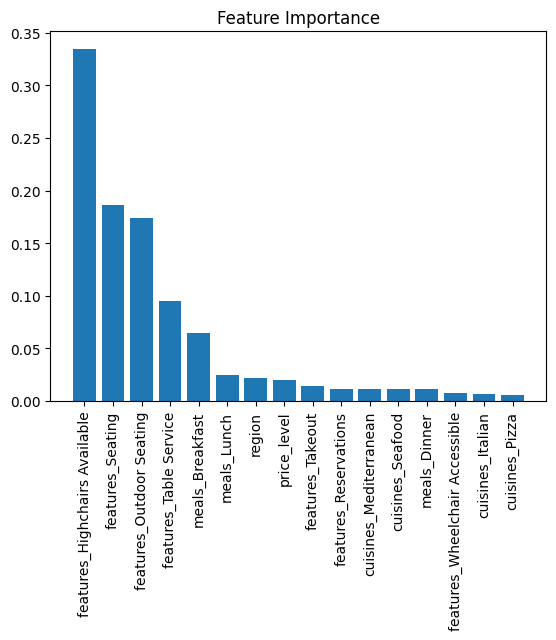

1

In [189]:
show_feature_importances(find_the_best_model(italian_clf_dict)[1], X_columns)


score:	  feature:
0.349	- features_Highchairs Available
0.289	- features_Seating
0.101	- features_Outdoor Seating
0.055	- meals_Breakfast
0.035	- features_Table Service
0.023	- meals_Lunch
0.018	- price_level
0.017	- features_Takeout
0.017	- cuisines_Seafood
0.017	- cuisines_Mediterranean
0.015	- meals_Dinner
0.014	- features_Reservations
0.013	- cuisines_Italian
0.013	- features_Wheelchair Accessible
0.012	- cuisines_Pizza
0.011	- region


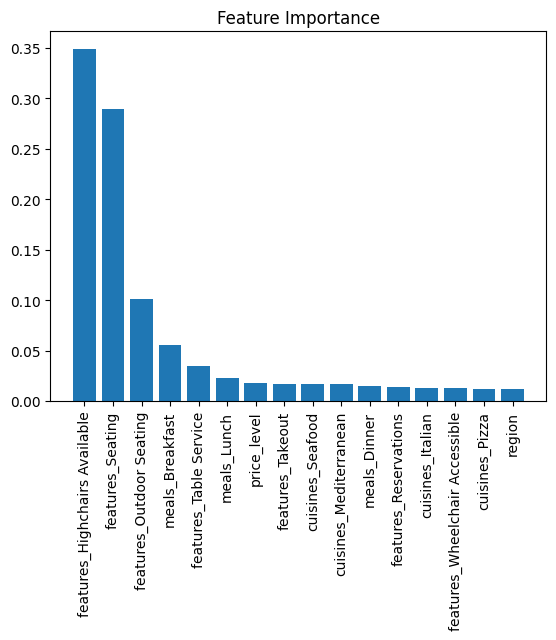

1

In [190]:
show_feature_importances(italian_clf_dict['xgb']['model'], X_columns)


In [ ]:
# ENSEMBLE MODELS

# Voting Classifier


# Bagging Classifier - based on forest
bag_on_forest_grid = {
    "estimator": [forest],
    "n_estimators": [40],
    "max_features": [7],
    "max_samples": [0.5],
    "bootstrap": [True],
    "random_state": [42]
}

# AdaBoost - based on forest
ada_on_forest_grid = {
    "estimator": [forest],
    "n_estimators": [60],
    "learning_rate": [0.01],
    "random_state": [42]
}

# AdaBoost - based on logreg
ada_on_logreg_grid = {
    "estimator": [logreg],
    "n_estimators": [60],
    "learning_rate": [0.01],
    "random_state": [42]
}


In [ ]:
# PIVOT DICTIONARY OF CLASSIFICATION MODELS
clf_ensemble_models_dict = { 
#     ensemble models (based on other models)
    'bag_on_forest': {'status': True, 'model': BaggingClassifier, 'grid': bag_on_forest_grid},
    'ada_on_forest': {'status': True, 'model': AdaBoostClassifier, 'grid': ada_on_forest_grid},
    'ada_on_logreg': {'status': True, 'model': AdaBoostClassifier, 'grid': ada_on_logreg_grid}
}

italian_ensemble_clf_dict = run_classification_models(italian_df2, 'features_Serves Alcohol', [], clf_ensemble_models_dict)
# drop_columns = ['special_diets_Gluten Free Options', 'special_diets_Vegan Options']
italian_ensemble_clf_dict


In [ ]:
find_the_best_model(italian_ensemble_clf_dict)

In [ ]:
show_feature_importances(find_the_best_model(italian_ensemble_clf_dict)[1], X_columns)


# ============== OLD:

<a id="voting"></a>

### 2.1.7. Voting Classifier

In [137]:
def clf_voting_by_weights(weights_list): 
    clf_voting = VotingClassifier(
        estimators=[
            ('logreg', logreg),
            ('svm', svm),
#             ('nb', nb),
            ('tree', tree)
        ],
        weights=weights_list
    )

    clf_voting.fit(X_train, y_train)
    y_pred_clf_voting = clf_voting.predict(X_test)

    return accuracy_score(y_test, y_pred_clf_voting)


In [138]:
from itertools import product

rrange = [1,2,3]
max_score = 0
weights_for_max = []

for p in product(rrange, repeat=3):
    weights = list(p)
    print(weights)
    score = clf_voting_by_weights(weights)
    if score > max_score:
        max_score = score
        weights_for_max = weights
print()
print(max_score)
print(weights_for_max)

[1, 1, 1]
[1, 1, 2]
[1, 1, 3]
[1, 2, 1]
[1, 2, 2]


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[1, 2, 3]


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[1, 3, 1]
[1, 3, 2]


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[1, 3, 3]


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[2, 1, 1]


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[2, 1, 2]
[2, 1, 3]
[2, 2, 1]
[2, 2, 2]
[2, 2, 3]
[2, 3, 1]
[2, 3, 2]


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[2, 3, 3]
[3, 1, 1]
[3, 1, 2]


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[3, 1, 3]
[3, 2, 1]
[3, 2, 2]
[3, 2, 3]


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[3, 3, 1]
[3, 3, 2]
[3, 3, 3]

0.7601101359490621
[1, 1, 3]


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<a id="stacked"></a>

### 2.1.12. Stacked Ensembles

In [146]:
start_time = time.time()

# Prepare the list of tuples with the first-layer classifiers
classifiers = [
#     ('logreg', logreg),
#     ('svm', svm),
#     ('nb', nb),
    ('knn', knn),
    ('tree', tree)
    ,('forest', forest)
]
# Instantiate the second-layer meta estimator
clf_meta = LogisticRegression(max_iter=500)

clf_stack = StackingClassifier(
    estimators=classifiers,
    final_estimator=clf_meta,
#     stack_method='predict_proba',
    passthrough = False,
    cv=5, 
    n_jobs=-1
)

clf_stack.fit(X_train, y_train)
y_pred_clf_stack = clf_stack.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_clf_stack))
print()
print("Classification report:\n", classification_report(y_test, y_pred_clf_stack))
print("Time using clf_model_implementation(): {} sec".format(time.time() - start_time))


Confusion matrix:
 [[3658 1531]
 [1169 5264]]

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      5189
           1       0.77      0.82      0.80      6433

    accuracy                           0.77     11622
   macro avg       0.77      0.76      0.76     11622
weighted avg       0.77      0.77      0.77     11622

Time using clf_model_implementation(): 16.233088970184326 sec


In [380]:
# from sklearn.ensemble

from sklearn.ensemble import StackingClassifier

start_time = time.time()

# Prepare the list of tuples with the first-layer classifiers
classifiers = [
    ('clf_ada', clf_ada),
    ('clf_xgb', clf_xgb)
    ,('forest', forest)
]

# grid = {
#     "n_estimators": [200, 300], # range(100, 400, 100)
#     "max_depth": [8, 10], # range(4, 10, 2)
#     "min_samples_split": [20, 30], # range(20, 40, 10)
#     "n_jobs": [-1],
#     "random_state": [42]
# }
# mod = RandomForestClassifier()
# mod_cv = GridSearchCV(mod, grid, cv=10)
# mod_cv.fit(X_train, y_train)
    
# print("Model: {0}".format(namestr(model, globals())[0]))
# if grid != {}:
#     print("Tuned hyperparameters:") # , mod_cv.best_params_
#     for k, v in mod_cv.best_params_.items():
#         print("\t{0}: {1}".format(k, v))
# print()

# clf_meta = RandomForestClassifier(mod_cv.best_params_) # max_iter=500 # GaussianNB # DecisionTreeClassifier

# Instantiate the second-layer meta estimator
clf_meta = RandomForestClassifier(max_depth=8,min_samples_split=20,n_estimators=300,n_jobs=-1) # max_iter=500 # GaussianNB # DecisionTreeClassifier

clf_stack = StackingClassifier(
    estimators=classifiers,
    final_estimator=clf_meta,
#     stack_method='predict_proba',
    passthrough = False,
    cv=5, 
    n_jobs=-1
)

clf_stack.fit(X_train, y_train)
y_pred_clf_stack = clf_stack.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_clf_stack))
print()
print("Classification report:\n", classification_report(y_test, y_pred_clf_stack))
print("Time using clf_model_implementation(): {} sec".format(time.time() - start_time))


Confusion matrix:
 [[23613  5674]
 [ 4662 17656]]

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82     29287
           1       0.76      0.79      0.77     22318

    accuracy                           0.80     51605
   macro avg       0.80      0.80      0.80     51605
weighted avg       0.80      0.80      0.80     51605

Time using clf_model_implementation(): 64.43616819381714 sec


<a id="uk_vegetarian"></a>

## 2.2. Classification of the UK dataset by the "Vegetarian Friendly" feature

In [210]:
# Logistic Regression
logreg_grid = {
    "C": np.logspace(-2, 1, 4), # np.logspace(-3, 3, 7) - from 0.001 to 1000 by 7 steps
    "penalty": ["l1", "l2"], # , "elasticnet", None
    "multi_class": ["multinomial"], # "auto", "ovr", 
    "max_iter": [1000],
    "solver": ['lbfgs', 'newton-cg'] # For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
}

# SVM
svm_grid = {
    "C": np.logspace(-2, 1, 4), # from 0.01 to 1 by 4 steps
    "penalty": ["l1", "l2"],
    "loss": ["hinge", "squared_hinge"],
    "max_iter": [1000]
}

# Naive Bayes
# no grid

# k-Nearest Neighbors
knn_grid = {
    "n_neighbors": [6, 8],
    "leaf_size": [12],
    "algorithm": ['auto']
    ,"n_jobs": [-1]
}

# Decision Tree
tree_grid = {
    "min_samples_split": range(4, 10, 2),
    "max_depth": range(4, 10, 2),
#     "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ['best', 'random']
}

# Random Forest
forest_grid = {
    "n_estimators": [200, 300], # range(100, 400, 100)
    "max_depth": [8, 10], # range(4, 10, 2)
    "min_samples_split": [20, 30], # range(20, 40, 10)
    "n_jobs": [-1],
    "random_state": [42]
}

# Gradient Boosting
gb_grid = {
    "n_estimators": [300], # range(100, 400, 100)
#     "max_depth": [6], # range(4, 10, 2),
    "learning_rate": [0.2], # [0.1, , 0.3],
#     "n_jobs": [-1],
#     "objective": ['reg:squarederror'],
    "random_state": [42]
}

# XGB
xgb_grid = {
    "n_estimators": [300], # range(100, 400, 100)
    "max_depth": [6], # range(4, 10, 2),
    "learning_rate": [0.2], # [0.1, , 0.3],
    "n_jobs": [-1],
    "objective": ['reg:squarederror'],
    "random_state": [42]
}


In [211]:
# PIVOT DICTIONARY OF CLASSIFICATION MODELS
clf_models_dict = {
#     simple models
    'logreg': {'status': True, 'model': LogisticRegression, 'grid': logreg_grid},
    'svm': {'status': True, 'model': LinearSVC, 'grid': svm_grid},
    'nb': {'status': True, 'model': GaussianNB, 'grid': {}},
    'knn': {'status': True, 'model': KNeighborsClassifier, 'grid': knn_grid},
    'tree': {'status': True, 'model': DecisionTreeClassifier, 'grid': tree_grid},
#     ensemble models (not based on other models)
    'forest': {'status': True, 'model': RandomForestClassifier, 'grid': forest_grid},
    'gb': {'status': True, 'model': GradientBoostingClassifier, 'grid': gb_grid},
    'xgb': {'status': True, 'model': XGBClassifier, 'grid': xgb_grid}
}

uk_clf_dict = run_classification_models(uk_df2, 'special_diets_Vegetarian Friendly', [], clf_models_dict)
# drop_columns = ['special_diets_Gluten Free Options', 'special_diets_Vegan Options']
uk_clf_dict

region
{'Aberdeenshire': 0, 'Angus': 1, 'Argyll and Bute': 2, 'Ayrshire': 3, 'Bedfordshire': 4, 'Belfast': 5, 'Berkshire': 6, 'Borders': 7, 'Brecon Beacons National Park': 8, 'Bristol': 9, 'Buckinghamshire': 10, 'Cambridgeshire': 11, 'Carmarthenshire': 12, 'Ceredigion': 13, 'Cheshire': 14, 'Clackmannanshire': 15, 'Cornwall': 16, 'Cotswolds': 17, 'Cumbria': 18, 'Derbyshire': 19, 'Devon': 20, 'Dorset': 21, 'Dumfries and Galloway': 22, 'Dundee': 23, 'Durham': 24, 'East Anglia': 25, 'East Dunbartonshire': 26, 'East Lothian': 27, 'East Renfrewshire': 28, 'East Sussex': 29, 'Edinburgh': 30, 'Essex': 31, 'Exmoor National Park': 32, 'Falkirk District': 33, 'Fife': 34, 'Glasgow': 35, 'Gloucestershire': 36, 'Greater London': 37, 'Greater Manchester': 38, 'Hampshire': 39, 'Herefordshire': 40, 'Hertfordshire': 41, 'Inverclyde': 42, 'Isle of Arran': 43, 'Isle of Wight': 44, 'Isles of Scilly': 45, 'Kent': 46, 'Lancashire': 47, 'Leicestershire': 48, 'Lincolnshire': 49, 'London': 50, 'Merseyside': 51,

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_l

Model: LogisticRegression
Tuned hyperparameters:
	C: 10.0
	max_iter: 1000
	multi_class: multinomial
	penalty: l2
	solver: lbfgs

Confusion matrix:
 [[6177  148]
 [ 451 3885]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      6325
           1       0.96      0.90      0.93      4336

    accuracy                           0.94     10661
   macro avg       0.95      0.94      0.94     10661
weighted avg       0.94      0.94      0.94     10661

Time using clf_model_implementation(): 36.11555194854736 sec


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

Model: LinearSVC
Tuned hyperparameters:
	C: 0.1
	loss: squared_hinge
	max_iter: 1000
	penalty: l2



/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion matrix:
 [[6212  113]
 [ 488 3848]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      6325
           1       0.97      0.89      0.93      4336

    accuracy                           0.94     10661
   macro avg       0.95      0.93      0.94     10661
weighted avg       0.95      0.94      0.94     10661

Time using clf_model_implementation(): 60.58976197242737 sec
Model: GaussianNB

Confusion matrix:
 [[5747  578]
 [ 266 4070]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      6325
           1       0.88      0.94      0.91      4336

    accuracy                           0.92     10661
   macro avg       0.92      0.92      0.92     10661
weighted avg       0.92      0.92      0.92     10661

Time using clf_model_implementation(): 0.12271618843078613 sec
Model: KNeighborsClassifier
Tuned hyperparameters:
	algorithm

{'logreg': {'model': LogisticRegression(C=10.0, max_iter=1000, multi_class='multinomial'),
  'accuracy_score': 0.943813901134978},
 'svm': {'model': LinearSVC(C=0.1), 'accuracy_score': 0.9436263014726574},
 'nb': {'model': GaussianNB(), 'accuracy_score': 0.9208329425007035},
 'knn': {'model': KNeighborsClassifier(leaf_size=12, n_jobs=-1, n_neighbors=8),
  'accuracy_score': 0.9199887440202608},
 'tree': {'model': DecisionTreeClassifier(max_depth=4, min_samples_split=4, splitter='random'),
  'accuracy_score': 0.942875902823375},
 'forest': {'model': RandomForestClassifier(max_depth=10, min_samples_split=30, n_estimators=200,
                         n_jobs=-1, random_state=42),
  'accuracy_score': 0.9471906950567489},
 'gb': {'model': GradientBoostingClassifier(learning_rate=0.2, n_estimators=300, random_state=42),
  'accuracy_score': 0.9443767001219397},
 'xgb': {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynod

In [212]:
find_the_best_model(uk_clf_dict)

(0.9471906950567489,
 RandomForestClassifier(max_depth=10, min_samples_split=30, n_estimators=200,
                        n_jobs=-1, random_state=42))

score:	  feature:
0.331	- features_Highchairs Available
0.086	- cuisines_Mediterranean
0.077	- features_Takeout
0.057	- meals_Lunch
0.045	- meals_Breakfast
0.039	- cuisines_Seafood
0.022	- meals_Dinner
0.010	- price_level
0.007	- features_Outdoor Seating
0.005	- features_Reservations
0.004	- region
0.004	- features_Seating
0.004	- features_Wheelchair Accessible
0.003	- features_Table Service
0.002	- cuisines_Pizza
0.001	- cuisines_Italian


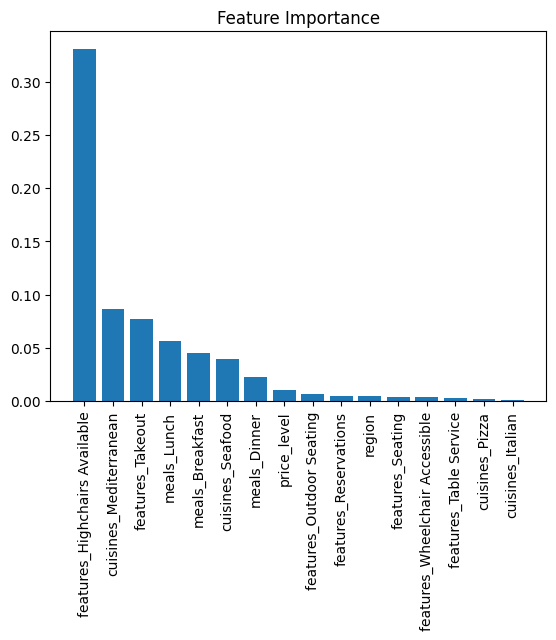

1

In [213]:
show_feature_importances(find_the_best_model(uk_clf_dict)[1], X_columns)


<a id="german_price_level"></a>

## 2.3. Classification of German dataset by the "price_level" feature

In [220]:
# Logistic Regression
logreg_grid = {
    "C": np.logspace(-2, 1, 4), # np.logspace(-3, 3, 7) - from 0.001 to 1000 by 7 steps
    "penalty": ["l1", "l2"], # , "elasticnet", None
    "multi_class": ["multinomial"], # "auto", "ovr", 
    "max_iter": [1000],
    "solver": ['lbfgs', 'newton-cg'] # For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
}

# SVM
svm_grid = {
    "C": np.logspace(-2, 1, 4), # from 0.01 to 1 by 4 steps
    "penalty": ["l1", "l2"],
    "loss": ["hinge", "squared_hinge"],
    "max_iter": [1000]
}

# Naive Bayes
# no grid

# k-Nearest Neighbors
knn_grid = {
    "n_neighbors": [6, 8],
    "leaf_size": [12],
    "algorithm": ['auto']
    ,"n_jobs": [-1]
}

# Decision Tree
tree_grid = {
    "min_samples_split": range(4, 10, 2),
    "max_depth": range(4, 10, 2),
#     "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ['best', 'random']
}

# Random Forest
forest_grid = {
    "n_estimators": [200, 300], # range(100, 400, 100)
    "max_depth": [8, 10], # range(4, 10, 2)
    "min_samples_split": [20, 30], # range(20, 40, 10)
    "n_jobs": [-1],
    "random_state": [42]
}

# Gradient Boosting
gb_grid = {
    "n_estimators": [300], # range(100, 400, 100)
#     "max_depth": [6], # range(4, 10, 2),
    "learning_rate": [0.2], # [0.1, , 0.3],
#     "n_jobs": [-1],
#     "objective": ['reg:squarederror'],
    "random_state": [42]
}

# XGB
xgb_grid = {
    "n_estimators": [300], # range(100, 400, 100)
    "max_depth": [6], # range(4, 10, 2),
    "learning_rate": [0.2], # [0.1, , 0.3],
    "n_jobs": [-1],
    "objective": ['reg:squarederror'],
    "random_state": [42]
}


In [221]:
# PIVOT DICTIONARY OF CLASSIFICATION MODELS
clf_models_dict = {
#     simple models
    'logreg': {'status': True, 'model': LogisticRegression, 'grid': logreg_grid},
    'svm': {'status': True, 'model': LinearSVC, 'grid': svm_grid},
    'nb': {'status': True, 'model': GaussianNB, 'grid': {}},
    'knn': {'status': True, 'model': KNeighborsClassifier, 'grid': knn_grid},
    'tree': {'status': True, 'model': DecisionTreeClassifier, 'grid': tree_grid},
#     ensemble models (not based on other models)
    'forest': {'status': True, 'model': RandomForestClassifier, 'grid': forest_grid},
    'gb': {'status': True, 'model': GradientBoostingClassifier, 'grid': gb_grid},
    'xgb': {'status': True, 'model': XGBClassifier, 'grid': xgb_grid}
}

german_clf_dict = run_classification_models(german_df2, 'price_level', [], clf_models_dict)
# drop_columns = ['special_diets_Gluten Free Options', 'special_diets_Vegan Options']
german_clf_dict

region
{'Baden-Wurttemberg': 0, 'Bavaria': 1, 'Berlin': 2, 'Brandenburg': 3, 'Hamburg': 4, 'Hesse': 5, 'Lower Saxony': 6, 'Mecklenburg-West Pomerania': 7, 'North Rhine-Westphalia': 8, 'Rhineland-Palatinate': 9, 'Saarland': 10, 'Saxony': 11, 'Saxony-Anhalt': 12, 'Schleswig-Holstein': 13, 'State of Bremen': 14, 'Thuringia': 15}

price_level
{'€': 0, '€€-€€€': 1, '€€€€': 2}



/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_l

Model: LogisticRegression
Tuned hyperparameters:
	C: 0.1
	max_iter: 1000
	multi_class: multinomial
	penalty: l2
	solver: lbfgs

Confusion matrix:
 [[ 269  633    0]
 [ 119 1994    0]
 [   1   62    0]]



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

           0       0.69      0.30      0.42       902
           1       0.74      0.94      0.83      2113
           2       0.00      0.00      0.00        63

    accuracy                           0.74      3078
   macro avg       0.48      0.41      0.42      3078
weighted avg       0.71      0.74      0.69      3078

Time using clf_model_implementation(): 12.68615984916687 sec




/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

Model: LinearSVC
Tuned hyperparameters:
	C: 0.01
	loss: squared_hinge
	max_iter: 1000
	penalty: l2

Confusion matrix:
 [[ 266  636    0]
 [ 119 1994    0]
 [   1   62    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.69      0.29      0.41       902
           1       0.74      0.94      0.83      2113
           2       0.00      0.00      0.00        63

    accuracy                           0.73      3078
   macro avg       0.48      0.41      0.41      3078
weighted avg       0.71      0.73      0.69      3078

Time using clf_model_implementation(): 24.06047487258911 sec


Model: GaussianNB

Confusion matrix:
 [[ 471  405   26]
 [ 485 1434  194]
 [   7   33   23]]

Classification report:
               precision    recall  f1-score   support

           0       0.49      0.52      0.51       902
           1       0.77      0.68      0.72      2113
           2       0.09      0.37      0.15        63

    accuracy         

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: RandomForestClassifier
Tuned hyperparameters:
	max_depth: 8
	min_samples_split: 20
	n_estimators: 200
	n_jobs: -1
	random_state: 42

Confusion matrix:
 [[ 249  653    0]
 [  96 2017    0]
 [   1   62    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.28      0.40       902
           1       0.74      0.95      0.83      2113
           2       0.00      0.00      0.00        63

    accuracy                           0.74      3078
   macro avg       0.49      0.41      0.41      3078
weighted avg       0.72      0.74      0.69      3078

Time using clf_model_implementation(): 14.74946665763855 sec




/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: GradientBoostingClassifier
Tuned hyperparameters:
	learning_rate: 0.2
	n_estimators: 300
	random_state: 42

Confusion matrix:
 [[ 298  604    0]
 [ 137 1968    8]
 [   1   58    4]]

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.33      0.45       902
           1       0.75      0.93      0.83      2113
           2       0.33      0.06      0.11        63

    accuracy                           0.74      3078
   macro avg       0.59      0.44      0.46      3078
weighted avg       0.72      0.74      0.70      3078

Time using clf_model_implementation(): 29.992581844329834 sec


Model: XGBClassifier
Tuned hyperparameters:
	learning_rate: 0.2
	max_depth: 6
	n_estimators: 300
	n_jobs: -1
	objective: reg:squarederror
	random_state: 42

Confusion matrix:
 [[ 325  577    0]
 [ 201 1896   16]
 [   2   58    3]]

Classification report:
               precision    recall  f1-score   support

           0       0.62      0

{'logreg': {'model': LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial'),
  'accuracy_score': 0.735217673814165},
 'svm': {'model': LinearSVC(C=0.01), 'accuracy_score': 0.7342430149447693},
 'nb': {'model': GaussianNB(), 'accuracy_score': 0.6263807667316439},
 'knn': {'model': KNeighborsClassifier(leaf_size=12, n_jobs=-1, n_neighbors=8),
  'accuracy_score': 0.7046783625730995},
 'tree': {'model': DecisionTreeClassifier(max_depth=4, min_samples_split=4, splitter='random'),
  'accuracy_score': 0.7309941520467836},
 'forest': {'model': RandomForestClassifier(max_depth=8, min_samples_split=20, n_estimators=200,
                         n_jobs=-1, random_state=42),
  'accuracy_score': 0.7361923326835608},
 'gb': {'model': GradientBoostingClassifier(learning_rate=0.2, n_estimators=300, random_state=42),
  'accuracy_score': 0.737491877842755},
 'xgb': {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode

In [222]:
find_the_best_model(german_clf_dict)

(0.737491877842755,
 GradientBoostingClassifier(learning_rate=0.2, n_estimators=300, random_state=42))

score:	  feature:
0.295	- cuisines_Italian
0.162	- features_Reservations
0.112	- cuisines_Seafood
0.069	- region
0.059	- meals_Breakfast
0.046	- features_Takeout
0.036	- features_Table Service
0.034	- meals_Dinner
0.032	- features_Wheelchair Accessible
0.032	- features_Seating
0.023	- features_Highchairs Available
0.023	- features_Outdoor Seating
0.019	- cuisines_Pizza
0.017	- meals_Lunch
0.015	- price_level
0.014	- cuisines_Mediterranean


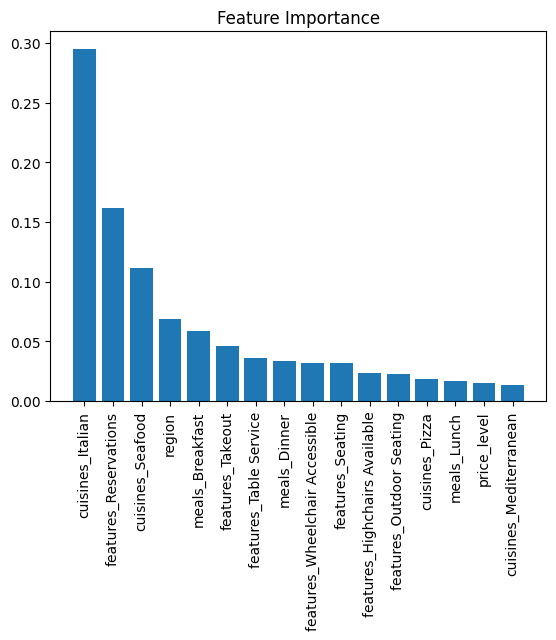

1

In [223]:
show_feature_importances(find_the_best_model(german_clf_dict)[1], X_columns)


<a id="conclusion"></a>

# 3. Conclusions

<a id="conclusion_italian_serves_alcohol"></a>

## 3.1. For Classification of Italian dataset by the "Serves Alcohol" feature

The **XGBoost model** has the best accuracy score - **77%**. The features **Highchairs Available** and **Seating** have the biggest importance for classification with XGBoost. 

!!!!!

**IDEA**: try Vegetarian feature for **ANOTHER COUNTRY**

!!!!!

# =========================== DRAFTS:

All models show the same (for **Dutch** dataset):

- it's impossible to recognize class 2 (High)
- there are a lot of following mistakes: restaurants predicted as class 1 (Middle), but actually are class 0 (Cheap)

For **Italian** dataset: a bit better

In [ ]:
# NB for Italy

# Confusion matrix:
#  [[12829  3987  1550]
#  [12174 11829  7373]
#  [  479   371  1013]]
# Classification report:
#                precision    recall  f1-score   support

#            0       0.50      0.70      0.59     18366
#            1       0.73      0.38      0.50     31376
#            2       0.10      0.54      0.17      1863

#     accuracy                           0.50     51605

# KNN for Italy:
    
# Confusion matrix:
#  [[10718  7631    17]
#  [ 8766 22522    88]
#  [  308  1542    13]]
# Classification report:
#                precision    recall  f1-score   support

#            0       0.54      0.58      0.56     18366
#            1       0.71      0.72      0.71     31376
#            2       0.11      0.01      0.01      1863

#     accuracy                           0.64     51605